In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
wyniki = pd.read_csv("../dane/przetworzone/sumy_laureaty_2014_znorm.csv", low_memory=False)

In [3]:
szkoly = pd.read_csv("../dane/szkoly2014.csv")

In [4]:
# dla LOU
szkoly.specjalna.fillna(False, inplace=True)
szkoly.publiczna.fillna(True, inplace=True)
# szkoly.dla_doroslych.fillna(False, inplace=True)

In [ ]:
df.group_by("id_szkoly").size()

In [5]:
df = wyniki.merge(szkoly, on="id_szkoly", how="left")

In [6]:
df.columns

Index(['Unnamed: 0', 'id_szkoly', 'plec', 'rocznik', 'dysleksja',
       'biologia_laureat', 'biologia_podstawowa', 'biologia_rozszerzona',
       'chemia_laureat', 'chemia_podstawowa', 'chemia_rozszerzona',
       'fizyka_laureat', 'fizyka_podstawowa', 'fizyka_rozszerzona',
       'geografia_laureat', 'geografia_rozszerzona', 'geografia_podstawowa',
       'historia_laureat', 'historia_podstawowa', 'historia_rozszerzona',
       'informatyka_laureat', 'informatyka_rozszerzona', 'j_angielski_laureat',
       'j_angielski_rozszerzona', 'j_polski_laureat', 'j_polski_rozszerzona',
       'matematyka_laureat', 'matematyka_rozszerzona', 'WOS_laureat',
       'WOS_rozszerzona', 'informatyka_podstawowa', 'j_angielski_podstawowa',
       'j_polski_podstawowa', 'matematyka_podstawowa', 'WOS_podstawowa',
       'typ_szkoly', 'publiczna', 'dla_doroslych', 'specjalna',
       'przyszpitalna', 'artystyczna', 'rok', 'id_szkoly_oke', 'nazwa_szkoly',
       'adres', 'miejscowosc', 'pna', 'poczta', 'wi

In [7]:
df["wielkosc_miejscowosci_log10"] = np.log10(df["wielkosc_miejscowosci"] + 1000)

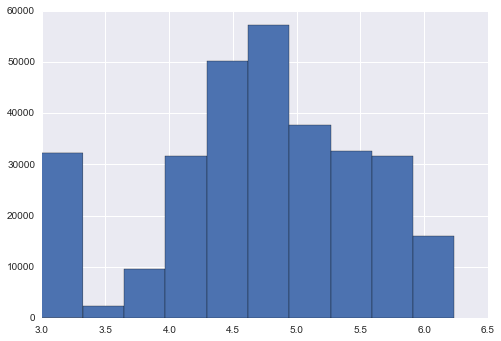

In [8]:
df["wielkosc_miejscowosci_log10"].hist()

In [9]:
# normalizacja
df["wielkosc_miejscowosci_log10"]  = (df["wielkosc_miejscowosci_log10"] - df["wielkosc_miejscowosci_log10"].mean())/df["wielkosc_miejscowosci_log10"].std()

In [10]:
def wiek_uprosc(wiek):
    if wiek <= 18:
        return "18m"
    elif wiek == 19:
        return "19"
    elif wiek == 20:
        return "20"
    else:
        return "21p"
    
df['wiek'] = (2014 - df.rocznik).apply(wiek_uprosc)

In [11]:
df['niepubliczna'] = df['publiczna'].apply(lambda x: not x)

In [12]:
# a moze tu dommy

In [13]:
formula_rhs = """ ~ C(plec) + C(typ_szkoly) + C(rodzaj_gminy, Treatment(reference='miejska'))
             + wielkosc_miejscowosci_log10 + C(wiek, Treatment(reference='19'))
             + niepubliczna + dla_doroslych + specjalna"""

In [14]:
reg_pol = smf.ols("j_polski_podstawowa" + formula_rhs, data=df).fit()
reg_pol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     j_polski_podstawowa   R-squared:                       0.182
Model:                             OLS   Adj. R-squared:                  0.182
Method:                  Least Squares   F-statistic:                     4443.
Date:                 Sun, 26 Jul 2015   Prob (F-statistic):               0.00
Time:                         13:54:26   Log-Likelihood:            -3.9462e+05
No. Observations:               300216   AIC:                         7.893e+05
Df Residuals:                   300200   BIC:                         7.895e+05
Df Model:                           15                                         
Covariance Type:             nonrobust                                         
===============================================================================================================================================
                                                                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                       0.3977      0.003    140.334      0.000         0.392     0.403
C(plec)[T.m]                                                                   -0.1615      0.003    -47.723      0.000        -0.168    -0.155
C(typ_szkoly)[T.LOU]                                                           -0.1796      0.032     -5.627      0.000        -0.242    -0.117
C(typ_szkoly)[T.LP]                                                            -0.7161      0.013    -55.566      0.000        -0.741    -0.691
C(typ_szkoly)[T.T]                                                             -0.1581      0.009    -18.225      0.000        -0.175    -0.141
C(typ_szkoly)[T.TU]                                                            -0.3918      0.025    -15.558      0.000        -0.441    -0.342
C(rodzaj_gminy, Treatment(reference='miejska'))[T.dzielnica m.st. Warszawy]    -0.1296      0.009    -15.188      0.000        -0.146    -0.113
C(rodzaj_gminy, Treatment(reference='miejska'))[T.miejsko-wiejska]              0.0329      0.006      5.555      0.000         0.021     0.045
C(rodzaj_gminy, Treatment(reference='miejska'))[T.wiejska]                     -0.0725      0.011     -6.621      0.000        -0.094    -0.051
C(wiek, Treatment(reference='19'))[T.18m]                                       0.3429      0.019     18.173      0.000         0.306     0.380
C(wiek, Treatment(reference='19'))[T.20]                                       -0.4649      0.009    -54.298      0.000        -0.482    -0.448
C(wiek, Treatment(reference='19'))[T.21p]                                      -0.7530      0.010    -73.169      0.000        -0.773    -0.733
niepubliczna[T.True]                                                           -0.2354      0.008    -30.233      0.000        -0.251    -0.220
dla_doroslych[T.True]                                                          -0.2990      0.012    -24.967      0.000        -0.322    -0.276
specjalna[T.True]                                                              -0.0426      0.055     -0.781      0.435        -0.149     0.064
wielkosc_miejscowosci_log10                                                     0.1216      0.003     43.383      0.000         0.116     0.127
==============================================================================
Omnibus:                      225.345   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.845
Skew:                           0.067   Prob(JB):                     9.09e-50
Kurtosis:           

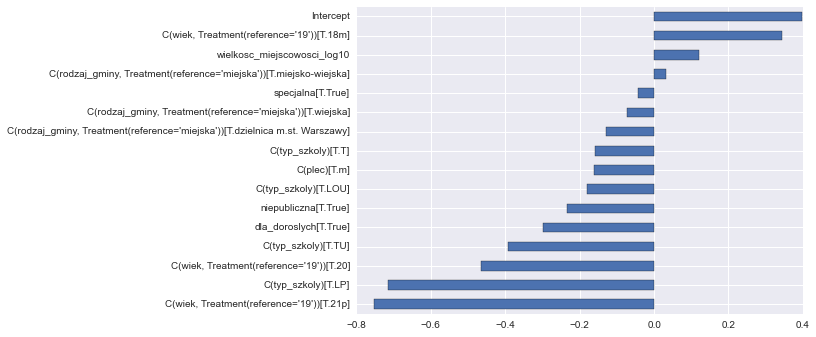

In [15]:
reg_pol.params.order().plot(kind="barh")

In [16]:
reg_mat = smf.ols("matematyka_podstawowa" + formula_rhs, data=df).fit()
# reg_mat.summary()

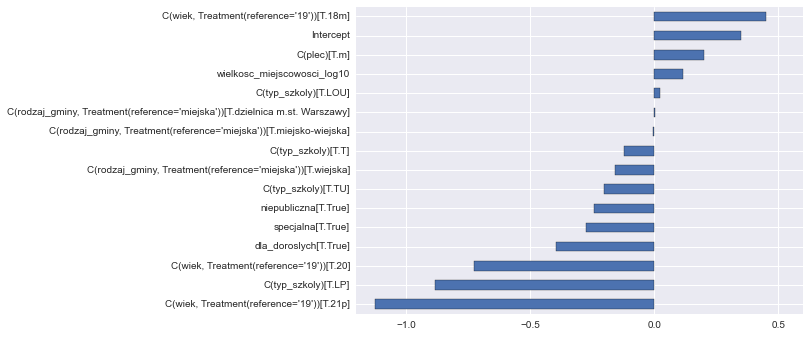

In [17]:
reg_mat.params.order().plot(kind="barh")

In [18]:
reg_ang = smf.ols("j_angielski_podstawowa" + formula_rhs, data=df).fit()

In [64]:
zebrane = pd.DataFrame({"pol": reg_pol.params,
                        "mat": reg_mat.params,
                        "ang": reg_ang.params})
bledy = pd.DataFrame({"pol": reg_pol.HC1_se,
                      "mat": reg_mat.HC1_se,
                      "ang": reg_ang.HC1_se})

In [65]:
# zebrane.index.tolist()

In [66]:
slownik = {'Intercept': "wyraz wolny",
 'C(plec)[T.m]': "mężczyzna",
 'C(typ_szkoly)[T.LOU]': "liceum ogólnokształcące uzupełniające",
 'C(typ_szkoly)[T.LP]': "liceum profilowane",
 'C(typ_szkoly)[T.T]': "technikum",
 'C(typ_szkoly)[T.TU]': "technikum uzupełniające",
 "C(rodzaj_gminy, Treatment(reference='miejska'))[T.dzielnica m.st. Warszawy]": "Warszawa",
 "C(rodzaj_gminy, Treatment(reference='miejska'))[T.miejsko-wiejska]": "gmina miejsko-wiejska",
 "C(rodzaj_gminy, Treatment(reference='miejska'))[T.wiejska]": "gmina wiejska",
 "C(wiek, Treatment(reference='19'))[T.18m]": "18 lat i mniej",
 "C(wiek, Treatment(reference='19'))[T.20]": "20 lat",
 "C(wiek, Treatment(reference='19'))[T.21p]": "21 lat i więcej",
 'niepubliczna[T.True]': "szkoła niepubliczna",
 'dla_doroslych[T.True]': "szkoła dla dorosłych",
 'specjalna[T.True]': "szkoła specjalna",
 'wielkosc_miejscowosci_log10': "wielkość miejscowości (skala log)"}

In [67]:
zebrane = zebrane.rename(index=slownik)
bledy = bledy.rename(index=slownik)

In [68]:
reg_pol.rsquared

0.18166548159374396

In [69]:
reg_mat.rsquared

0.29313373477164195

In [70]:
reg_ang.rsquared

0.26059499165625388

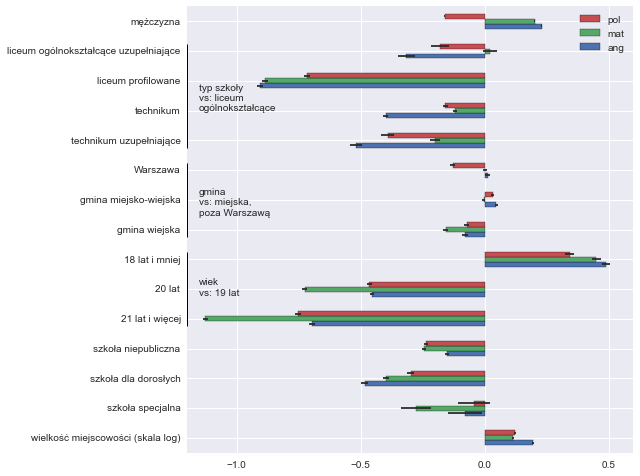

In [83]:
# plt.style.use("ggplot")

zebrane \
  .iloc[::-1] \
  .drop("wyraz wolny") \
  .plot(kind="barh", xerr=bledy, figsize=(8,8), legend="reverse")
#plt.legend(loc="upper right")
plt.text(-1.15, 4.8, "wiek\nvs: 19 lat")
plt.vlines(-1.2, 3.75, 6.25, linewidth=1)
plt.text(-1.15, 7.5, "gmina\nvs: miejska,\npoza Warszawą")
plt.vlines(-1.2, 6.75, 9.25, linewidth=1)
plt.text(-1.15, 11, "typ szkoły\nvs: liceum\nogólnokształcące")
plt.vlines(-1.2, 9.75, 13.25, linewidth=1)